In [102]:
# imoort python libraries: numpy, pandas, matplotlib, seaborn, keras, sklearn
import pandas as pd
import numpy as np
import os

# import libraries for visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# import libraries for machine learning
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

#no Warning
import warnings
warnings.filterwarnings("ignore")

In [75]:
# Import libraries for deep learning
from tensorflow.keras.models import Sequential  # For initializing the neural network
from tensorflow.keras.layers import Dense, Input  # For adding layers in the neural network
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical  # For using Keras with numpy

In [76]:
# Load the dataset no column name is provided
file_path = 'DATA/pima_diabetes.csv'
df = pd.read_csv(file_path, header=None)

# Display the first few rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
# Assigning column names
column_names = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']
df.columns = column_names

# Display the first few rows of the dataset with proper column names
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
missing_values

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [79]:
#   check the data types for each column
print (df.describe(include=None))

             preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [80]:
print(df.groupby('class').size())

class
0    500
1    268
dtype: int64


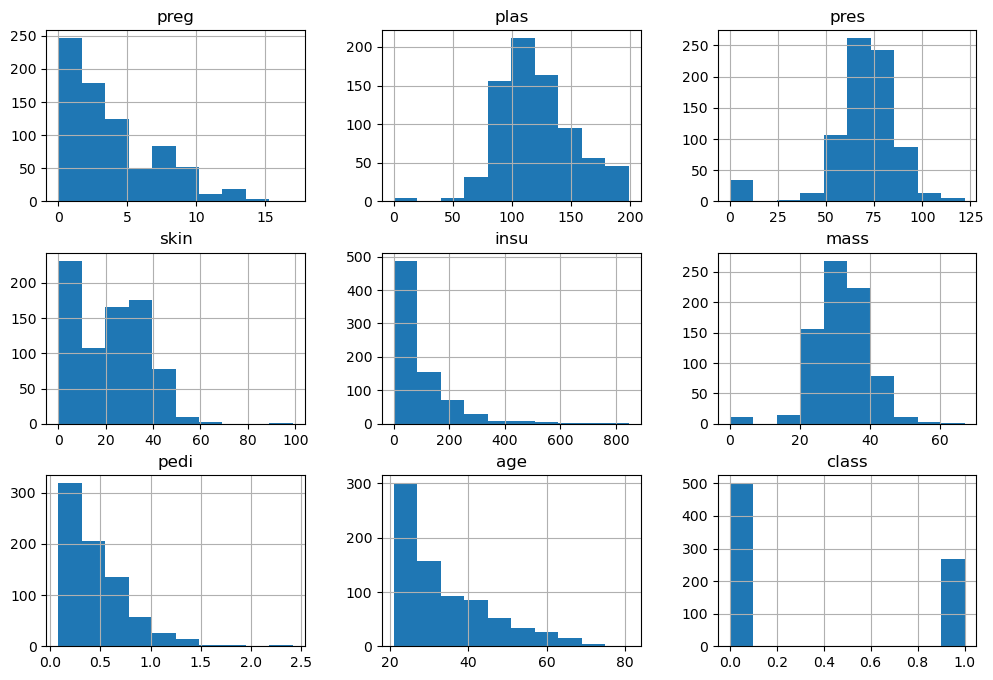

In [52]:
df.hist(figsize=(12, 8))
pyplot.show()

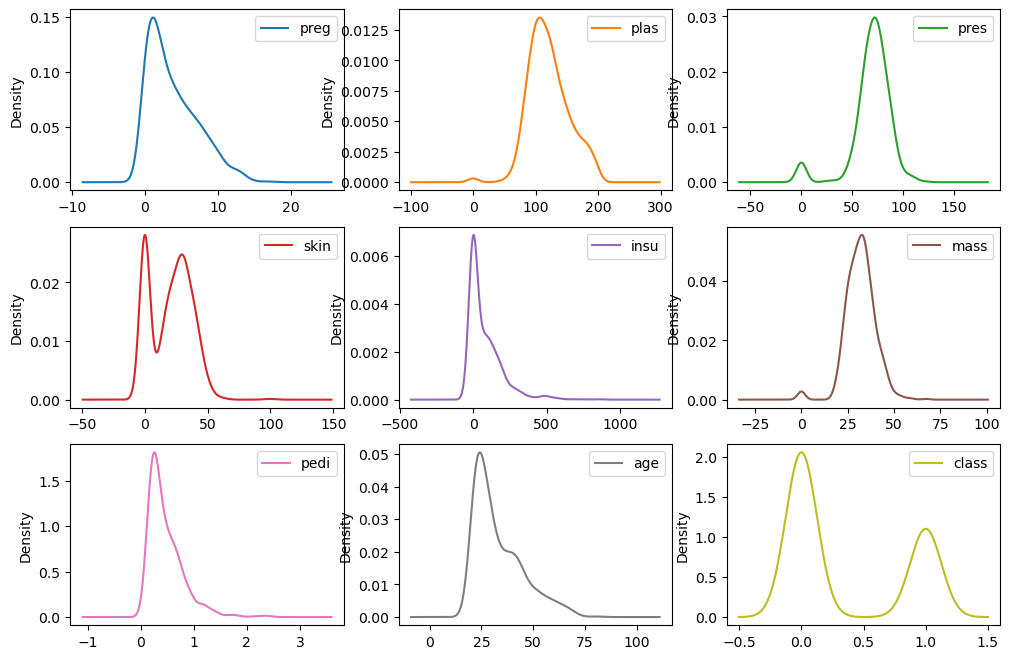

In [53]:
#density plots

df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12, 8))
pyplot.show()

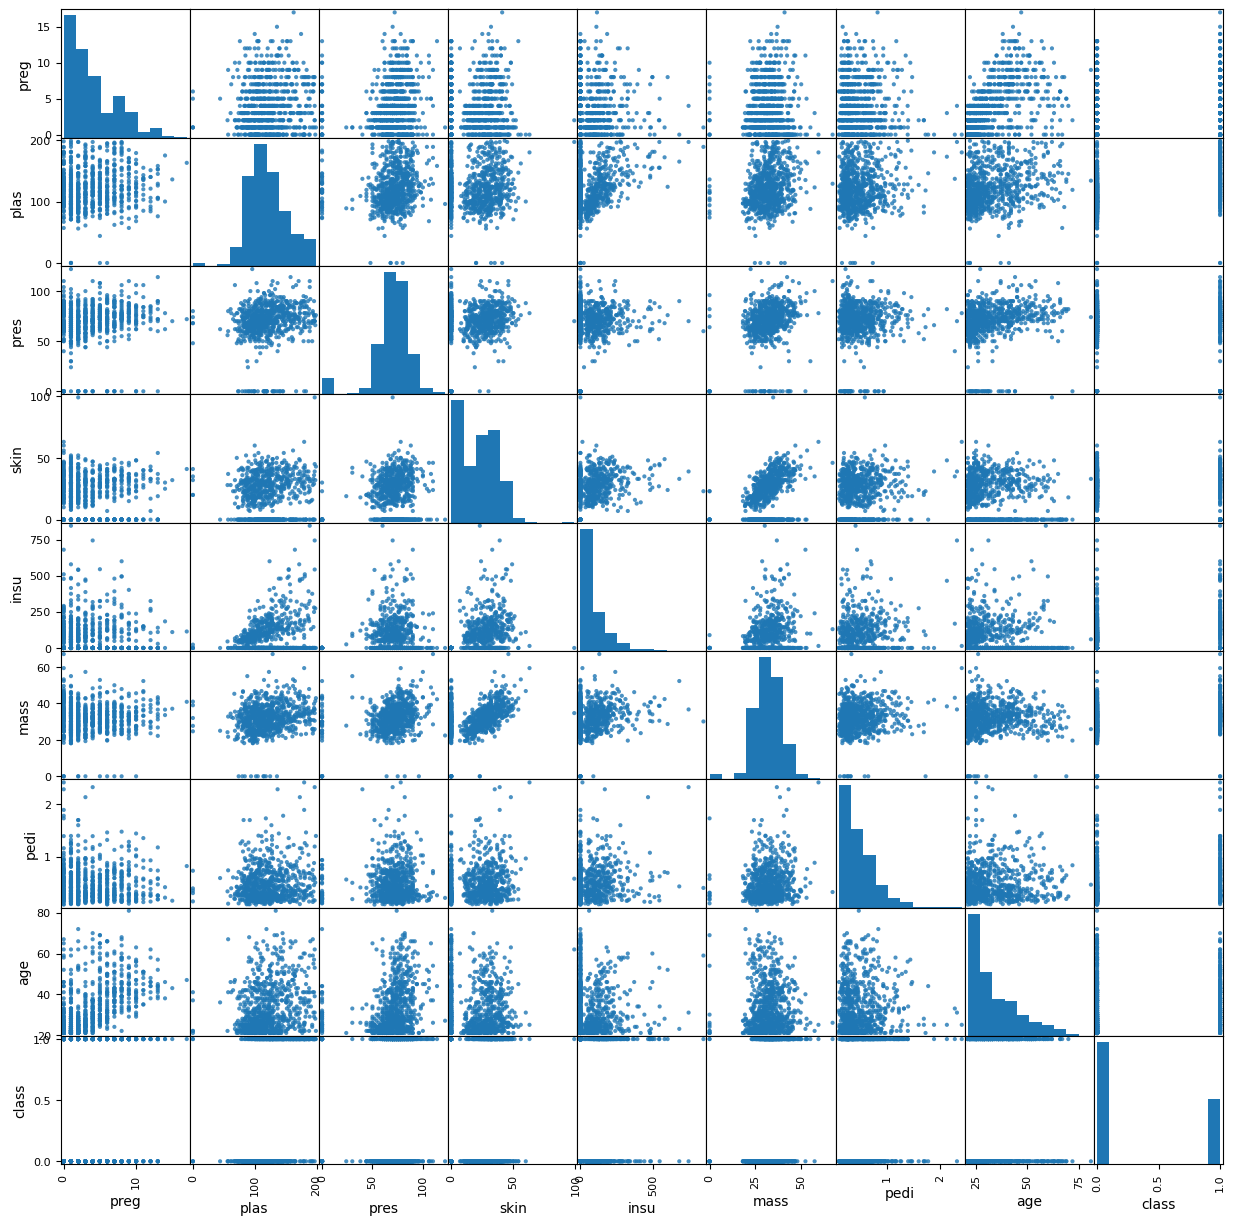

In [54]:
# scatter plot matrix
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

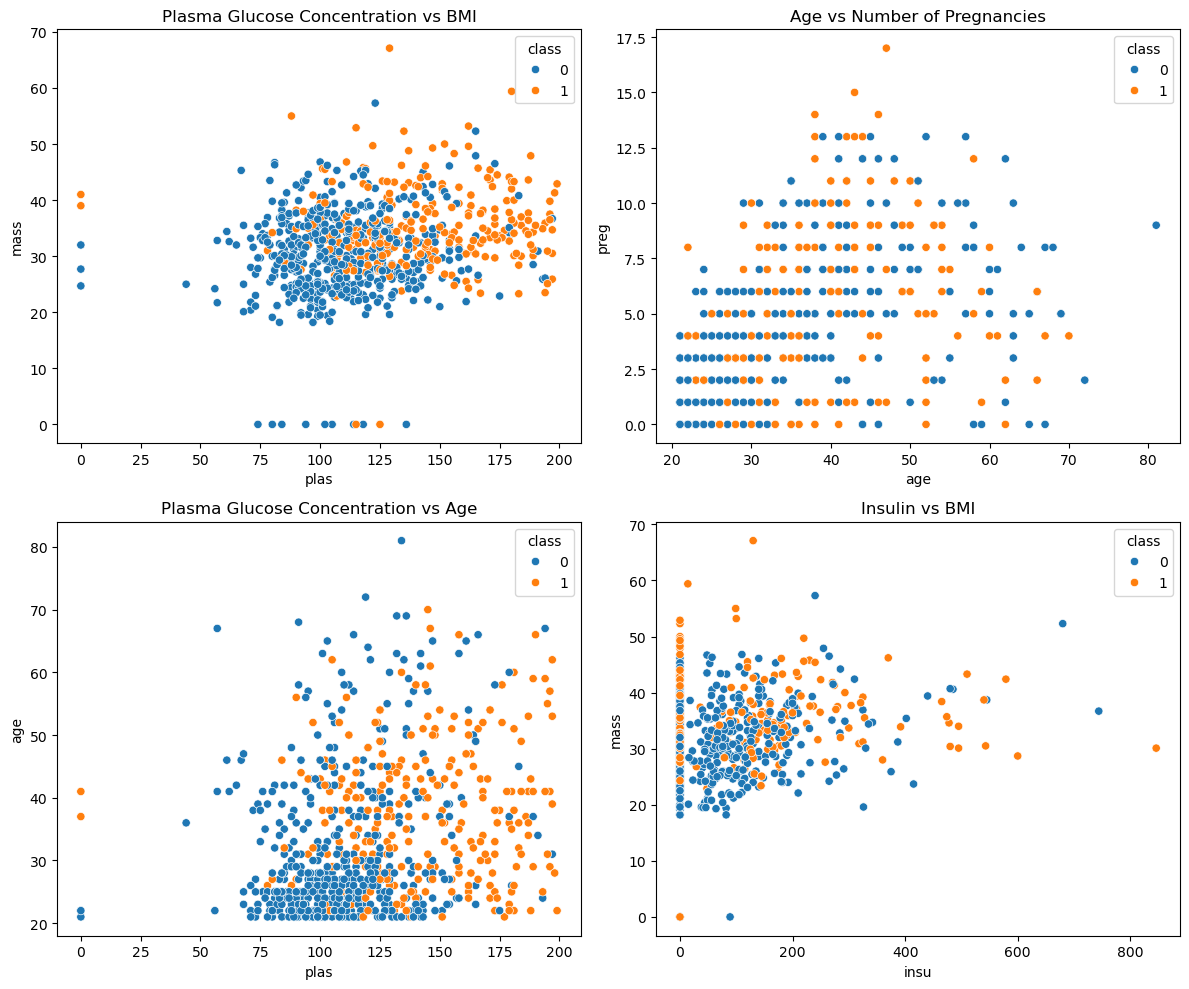

In [104]:
# Scatter plots for selected pairs of features
plt.figure(figsize=(12, 10))

# Scatter plot for 'plas' vs 'mass'
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='plas', y='mass', hue='class')
plt.title('Plasma Glucose Concentration vs BMI')

# Scatter plot for 'age' vs 'preg'
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='age', y='preg', hue='class')
plt.title('Age vs Number of Pregnancies')

# Scatter plot for 'plas' vs 'age'
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='plas', y='age', hue='class')
plt.title('Plasma Glucose Concentration vs Age')

# Scatter plot for 'insu' vs 'mass'
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='insu', y='mass', hue='class')
plt.title('Insulin vs BMI')

plt.tight_layout()
plt.show()


>   Plasma Glucose Concentration vs BMI: Visualizes the relationship between plasma glucose concentration and body mass index.

>   Age vs Number of Pregnancies: Shows the relationship between age and the number of times pregnant.

>   Plasma Glucose Concentration vs Age: Illustrates the relationship between plasma glucose concentration and age.

>   Insulin vs BMI: Displays the relationship between insulin levels and body mass index.

In [81]:
# store the data in numpy arrays
array = df.values

# split the data into input and output variables
# X contains the input variables
X = array[:, 0:8]
# Y contains the output variable
Y = array[:, 8]

In [82]:
random_seed = 7
np.random.seed(random_seed)

In [83]:
# standard scaler on X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)


In [84]:
# split the data into training and testing sets 67% training and 33% testing
test_size = 0.33

# import the train_test_split function from the sklearn.model_selection library
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, Y, 
                                                    test_size=test_size, random_state=random_seed)


In [85]:
# Define the model
def baseline_model():
    model = Sequential()
    model.add(Input(shape=(8,)))  # Adjust the shape according to your input features
    model.add(Dense(12, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [86]:
# create the model
modle = baseline_model()

In [87]:
# fit the model
history = modle.fit(X_train, Y_train, epochs=150, batch_size=10)

Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6371 - loss: 0.6567  
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.6921 - loss: 0.6266
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7264 - loss: 0.5881
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7799 - loss: 0.5236
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7321 - loss: 0.5342  
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7449 - loss: 0.5095  
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7484 - loss: 0.5111  
Epoch 8/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.7654 - loss: 0.4844
Epoch 9/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.7691 - loss: 0.4769
Epoch 10/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8054 - loss: 0.4276
Epoch 11/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.8028 - loss: 0.4306
Epoch 12/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [88]:
# Create keras classifier for use in scikit-learn

evaluator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=10, verbose=0)

In [89]:
# evaluate the model using 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

In [105]:
# evaluate the model
results = cross_val_predict(evaluator, X_train, Y_train, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 31.13% (46.30%)


In [91]:
# evaluate the model on the test data
scores = modle.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (modle.metrics_names[1], scores[1]*100))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7632 - loss: 0.6480  

compile_metrics: 75.20%


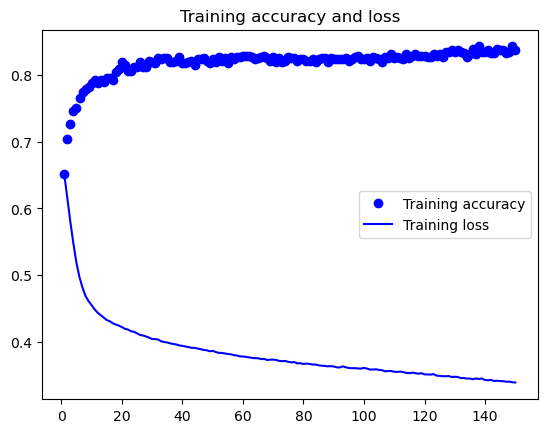

In [100]:
training_loss = history.history['loss']
# Accessing the accuracy and loss values
accuracy = history.history['accuracy']
loss = history.history['loss']

# Number of epochs
epochs = range(1, len(accuracy) + 1)

# Plotting training accuracy
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
# Plotting training loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training accuracy and loss')
plt.legend()

plt.show()